In [1]:
#edit notes: I should probably make it so the values are NaN instead of 0
#          otherwize the y values get a little wonky
#          I would have to tweak the dB function and the initial mask a bit, but it would be cleaner


import numpy as np
import matplotlib.pyplot as plt
import ast

In [2]:
voltages = np.loadtxt("data/voltages-4K.csv", delimiter=",")
print(len(voltages))
# Load the 2D array from the CSV file
loaded_arr = np.loadtxt("data/raw_data.csv", delimiter=",")
 
# Reshape the 2D array back to its original 3D shape
real_values = loaded_arr.reshape((314, 2, 144))

314


In [3]:
print(real_values[0][0])
print(real_values[0][1])

[1537.81418283 1537.83357341 1537.91944598 1538.24354571    0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.       

In [4]:
masked_values = np.ma.array(real_values)
masked_values = np.ma.masked_where(masked_values == 0.0, masked_values) #masks all values that are 0
print(masked_values.shape)
print(masked_values)

(314, 2, 144)
[[[1537.8141828254818 1537.8335734071986 1537.9194459833732 ... -- -- --]
  [-16.03174603174606 -16.03174603174606 -16.22222222222225 ... -- -- --]]

 [[1537.72 1537.72 1537.733850415512 ... -- -- --]
  [-15.333333333333364 -15.333333333333364 -15.428571428571459 ... -- --
   --]]

 [[1537.72 1537.72 1537.733850415512 ... -- -- --]
  [-15.333333333333364 -15.333333333333364 -15.428571428571459 ... -- --
   --]]

 ...

 [[1537.733850415512 1537.7864819944577 1537.7892520775601 ... -- -- --]
  [-16.285714285714313 -16.60317460317463 -16.60317460317463 ... -- --
   --]]

 [[1537.7255401662048 1537.7504709141265 1537.7587811634337 ... -- -- --]
  [-16.41269841269844 -16.698412698412724 -16.730158730158756 ... -- --
   --]]

 [[1537.9637673130117 1538.2047645429209 1538.218614958433 ... -- -- --]
  [-21.714285714285722 -17.1746031746032 -17.079365079365104 ... -- --
   --]]]


In [5]:
# y_values = [0,0,100,97,98,0,99,101,0,102,99,105,101]
# x_values = [0,1,2,3,4,5,6,7,8,9,10,11,12]

# #give a threshold
# threshold = 0

# #prepare for masking arrays - 'conventional' arrays won't do it
# y_values = np.ma.array(y_values)
# #mask values below a certain threshold
# y_values_masked = np.ma.masked_where(y_values < threshold , y_values)

In [6]:
# new_values = np.zeros((314, 2, 144))
# for i in range(0,2): #len(load_original_arr)):
#     for j in range(0, 2):
#         line = np.zeros((2,144))
#         y = np.ma.array(load_original_arr[i][j])
#         y = np.ma.masked_where(y == 0.0, y)
#         print(y)
#         line[j] = y
#         print(line[j])
#     new_values[i] = line
#     # targetx = load_original_arr[i][0]
#     # targety = load_original_arr[i][1]
#     # tmpx = targetx[targetx != 0]
#     # tmpy = targety[targety != 0]
#     # line = []
#     # line.append(tmpx)
#     # line.append(tmpy)
#     # new_values.append(line)

# #print(new_values[0][0])

In [7]:
#now i have all the x and y arrays in one big array
#so x would be new_values[n][0]
#and y would be new_values[n][1]
#with voltage[n] being the voltage
#next I need to graph 1 amd -1 to match them up as well as n=100 to check for differences

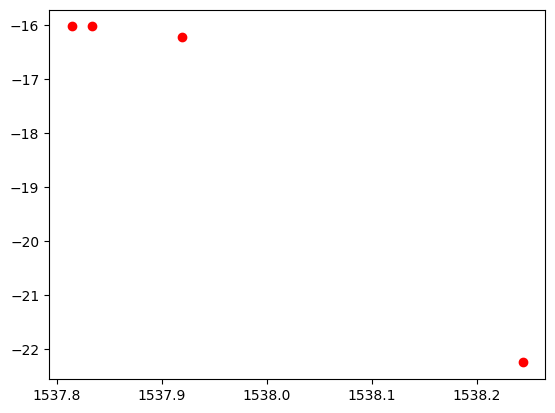

In [8]:

plt.plot(masked_values[0][0], masked_values[0][1], 'ro', label='data')
plt.show()

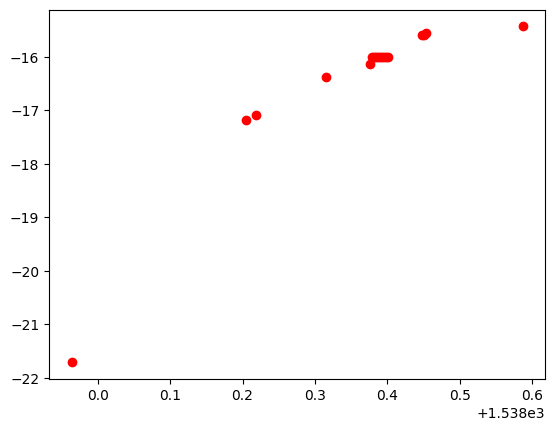

In [9]:
plt.plot(masked_values[313][0], masked_values[313][1], 'ro', label='data')
plt.show()

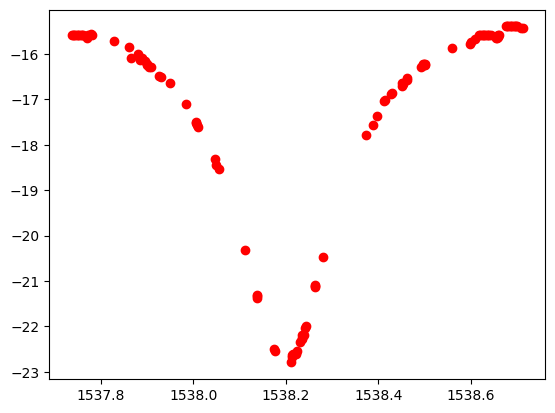

In [10]:
plt.plot(masked_values[243][0], masked_values[243][1], 'ro', label='data')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


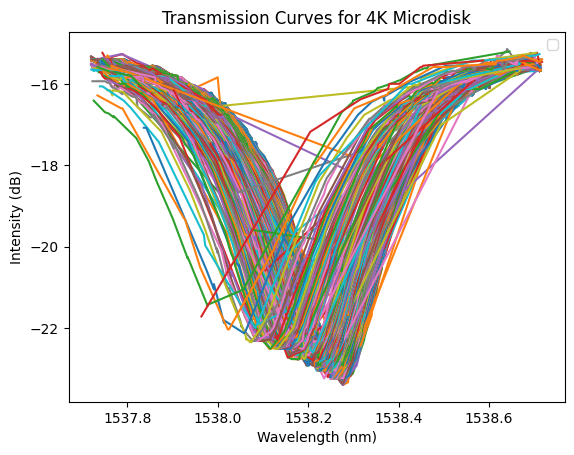

In [11]:
#This is everything, but we should clean up some noise.

for i in range(0,314):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (dB)')
plt.savefig("figures/4K-crude.png")
plt.show()

In [12]:
# seta threshold for the number of points in an array and mask the smaller ones 

threshold = 40
check = []
for i in range(len(real_values)):
    new_values = real_values[i][0][real_values[i][0] != 0]
    if len(new_values) < threshold:
        check.append(i)

print(len(check))
print(check)

38
[0, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 138, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 287, 309, 310, 312, 313]


In [13]:
print(masked_values[0][0])
print(masked_values[0][1])

[1537.8141828254818 1537.8335734071986 1537.9194459833732
 1538.2435457063546 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- --]
[-16.03174603174606 -16.03174603174606 -16.22222222222225
 -22.25396825396826 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

In [14]:
print(masked_values[311][0])
print(masked_values[311][1])
print(voltages)

[1537.733850415512 1537.7864819944577 1537.7892520775601 1537.924986149578
 1537.9277562326804 1537.9582271468068 1537.9609972299093
 1538.0219390581622 1538.0247091412646 1538.1244321329511
 1538.1244321329511 1538.213074792228 1538.2158448753305 1538.301717451505
 1538.37650969527 1538.37650969527 1538.4762326869566 1538.479002770059
 1538.4817728531614 1538.4845429362638 1538.4873130193662
 1538.4900831024686 1538.492853185571 1538.4956232686734
 1538.4983933517758 1538.5011634348782 1538.5898060941552
 1538.5898060941552 1538.5925761772576 1538.5925761772576 1538.59534626036
 1538.59534626036 1538.5981163434624 1538.5981163434624 1538.6008864265648
 1538.6008864265648 1538.6036565096672 1538.6036565096672
 1538.6064265927696 1538.6064265927696 1538.609196675872 1538.609196675872
 1538.6119667589744 1538.6119667589744 1538.6147368420768
 1538.6147368420768 1538.6175069251792 1538.6202770082816
 1538.623047091384 1538.6258171744864 1538.6285872575888
 1538.6729085872273 1538.67290858

In [15]:
#masks all arrays in the index check
print(len(masked_values) - len(check))
check.append(311)
check.append(308)
masked_voltages = np.ma.array(voltages)
for i in check:
    masked_values[i][0] = np.ma.masked_greater(masked_values[i][0], 0)
    masked_values[i][1] = np.ma.masked_less(masked_values[i][1], 0)
    masked_voltages[i] = np.ma.masked

print(masked_values[0][0])
print(masked_values[0][1])
print(masked_voltages)

276
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
[-- -0.9866242038216645 -0.9799363057324925 -0.9732484076433204
 -0.9665605095541484 -0.9598726114649764 -0.9531847133

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


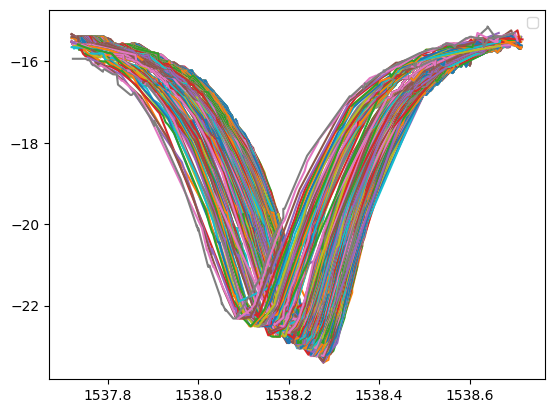

In [16]:
#nope! now we can re plot


for i in range(len(masked_values)):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.show()


In [17]:
#better, but still some noise
#The tops are generally fine, that'll get fixed in fits
#I should find a way to get rid of data with no full bottom curve
#I can see two in particular that are bad

#let's plot piece by piece to see what's going on
#we'll take down all the check values and mask those arrays


# for i in range(0,50):
#     plt.plot(masked_values[i][0], masked_values[i][1])
# plt.legend(loc = 'upper right')
# plt.show()

#this one has some issues. Ill expand and find them

In [18]:
#find the lowest value on the graph

#should be 15.142857142857174
test = masked_values[1][1]
lowest = 15.142857142857174
print(test[0])
print(test[0]+lowest)


-15.333333333333364
-0.1904761904761898


In [19]:
#i assume the top of the graph is 0 because there is around 15db of loss so I get rid of that and reposition the curve

#add the lowest value to each y value so the top is 0
        
for i in range(0,len(masked_values)):
    masked_values[i][1] = masked_values[i][1] + lowest


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


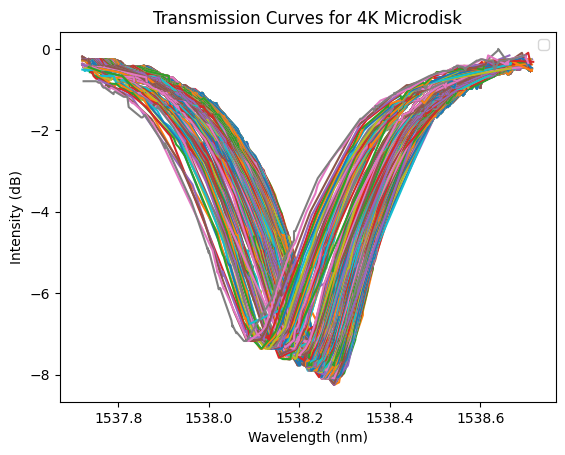

In [20]:
#lets regraph

for i in range(len(masked_values)):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (dB)')
plt.show()


In [21]:
#sick, I did it. Now I need to convert from dB to a fraction. I can check the binary code for this.

def dB2Frac(dB):
    return 10**(dB/10)

In [22]:
#run all values through dB2Frac

for i in range(0,len(masked_values)):
    masked_values[i][1] = dB2Frac(masked_values[i][1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


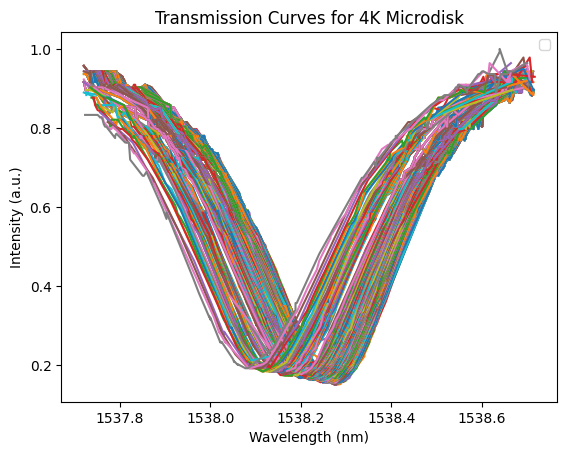

In [23]:
#lets regraph again

for i in range(len(masked_values)):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.savefig("figures/Gehl-4K-Curves.png")
plt.show()


In [24]:
normalized_values = np.ma.getdata(masked_values)
data_mask = np.ma.getmask(masked_values)


In [25]:
print(normalized_values[10][0])

[1537.73385042 1537.7366205  1537.73939058 1537.74216066 1537.74493075
 1537.74770083 1537.75047091 1537.753241   1537.75601108 1537.75878116
 1537.76155125 1537.76432133 1537.76709141 1537.7698615  1537.77263158
 1537.77540166 1537.77817175 1537.78094183 1537.78371191 1537.78648199
 1537.78925208 1537.81418283 1537.81695291 1537.81695291 1537.81972299
 1537.81972299 1537.82249307 1537.82526316 1537.82803324 1537.83080332
 1537.83357341 1537.83634349 1537.83911357 1537.84188366 1537.84465374
 1537.84742382 1537.85019391 1537.85296399 1537.85573407 1537.87789474
 1537.9499169  1537.95268698 1537.95545706 1537.95822715 1537.96099723
 1537.98315789 1537.98315789 1537.98592798 1537.98592798 1537.98869806
 1537.99700831 1538.01362881 1538.01639889 1538.02193906 1538.02193906
 1538.02747922 1538.0634903  1538.07734072 1538.0801108  1538.08288089
 1538.08288089 1538.08842105 1538.0967313  1538.10227147 1538.11058172
 1538.11058172 1538.16044321 1538.17429363 1538.17429363 1538.17429363
 1538.

In [26]:
# Reshape the data and the mask to 2D array
data_reshaped = normalized_values.reshape(normalized_values.shape[0], -1)
mask_reshaped = data_mask.reshape(data_mask.shape[0], -1)

# # Save the 2D array to a CSV file
np.savetxt("data/normalized_data.csv", data_reshaped, delimiter=",")
np.savetxt("data/cleaning_mask.csv", mask_reshaped, delimiter=",")
 
# # Load the 2D array from the CSV file
loaded_data = np.loadtxt("data/normalized_data.csv", delimiter=",")
loaded_mask = np.loadtxt("data/cleaning_mask.csv", delimiter=",")
 
# Reshape the 2D array back to its original 3D shape
load_original_arr = loaded_data.reshape(314,2,144)
load_original_mask = loaded_mask.reshape(314,2,144)
 
# Verify if the loaded array matches the original
if np.array_equal(load_original_arr,normalized_values):
    print("Yes, both the arrays are the same")
else:
    print("No, both the arrays are not the same")

Yes, both the arrays are the same


In [27]:
# Verify if the loaded array matches the original
if np.array_equal(load_original_mask,data_mask):
    print("Yes, both the arrays are the same")
else:
    print("No, both the arrays are not the same")

Yes, both the arrays are the same


In [28]:
print(normalized_values.shape[0],normalized_values.shape[1],normalized_values.shape[2])
print(data_mask.shape[0],data_mask.shape[1],data_mask.shape[2])

314 2 144
314 2 144


In [29]:
clean_data = np.ma.masked_array(load_original_arr, load_original_mask)
if np.array_equal(masked_values,clean_data):
    print("Yes, both the arrays are the same")
else:
    print("No, both the arrays are not the same")

Yes, both the arrays are the same


In [30]:
i = 1
j = 1
print(masked_values[i][j])
print(clean_data[i][j])

[0.9570891236771281 0.9570891236771281 0.9363292088239417
 0.9431986589505851 0.9431986589505851 0.9431986589505851
 0.9431986589505851 0.9431986589505851 0.9431986589505851
 0.9431986589505851 0.9431986589505851 0.9431986589505851
 0.9431986589505851 0.9431986589505851 0.9431986589505851
 0.9431986589505851 0.9431986589505851 0.9431986589505851
 0.9431986589505851 0.9431986589505851 0.9431986589505851
 0.9431986589505851 0.9431986589505851 0.9295097898806494
 0.9160195906610529 0.9227400377364763 0.8896237102461821
 0.896150501946605 0.9027251779484579 0.9027251779484579
 0.9027251779484579 0.9027251779484579 0.9027251779484579
 0.9027251779484579 0.9027251779484579 0.9027251779484579
 0.9027251779484579 0.9027251779484579 0.9027251779484579
 0.9027251779484579 0.9093480895585433 0.9027251779484579
 0.7972367344807172 0.7972367344807172 0.7742636826811278
 0.779944126805828 0.7742636826811278 0.779944126805828 0.7686246100397746
 0.7574693761440104 0.7410393495523065 0.735642254459642

In [31]:
volt_mask = np.ma.getmask(masked_voltages)
np.savetxt("data/voltage_mask.csv", volt_mask, delimiter = ",")